In [19]:
import  torch
import torch.nn as nn
import torch.nn.functional as F

In [114]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         print("here")
#         self.conv1=torch.nn.Conv2d(1,6,3)
#         self.conv2=torch.nn.Conv2d(6,16,3)
#         #  y=wx+b
#         self.fc1=nn.Linear(16*6*6,120)
#         self.fc2=nn.Linear(120,84)
#         self.fc3=nn.Linear(84,10)

#     def forward(self,x):
#         # max pooling over a 2*2 window
#         x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
#         print(x.size())
#         x=F.max_pool2d(F.relu(self.conv2(x)),2)
#         x=x.view(-1,self.num_flat_features(x))
#         x=F.relu(self.fc1(x))
#         x=F.relu(self.fc2(x))
#         x=self.fc3(x)
#         return x

#     def num_flat_features(self,x):
#         size=x.size()[1:]
#         num_features=1
#         for s in size:
#             num_features*=s
#         return num_features

In [115]:
# net=Net()
# print(net)

In [116]:
# params=list(net.parameters())
# print((params[0]))
# print(params[0].size())

In [117]:
# input=torch.randn(1,1,32,32)
# out=net(input)
# print(out)

In [118]:
# net.zero_grad()
# out.backward(torch.randn(1,10))

In [119]:
# output=net(input)
# target=torch.randn(10)
# target=target.view(1,-1)
# criterion=nn.MSELoss()

# loss=criterion(output,target)
# print(loss)

In [120]:
# net.zero_grad()
# print("conv1.bias grad before backward")
# print(net.conv1.bias.grad)

# loss.backward()
# print("conv1.bias grad after backward")
# print(net.conv1.bias.grad)

In [121]:
# learning_rate=0.01
# for f in net.parameters():
#     f.data.sub_(f.grad.data*learning_rate)

In [122]:
# import torch.optim as optim
# optimizer=optim.SGD(net.parameters(),lr=0.01)

# optimizer.zero_grad()
# output=net(input)
# loss=criterion(output,target)
# loss.backward()
# optimizer.step()

In [17]:
import torch
import torchvision
import torchvision.transforms as transforms

In [18]:
#  首先化为0到1，然后三通化为-1到1
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [125]:
print(trainset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


4
3
32
tensor([3, 3, 8, 1])


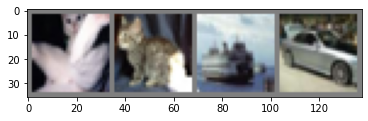

  cat   cat  ship   car


In [126]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(len(images))
print(len(images[0]))
print(len(images[0][0]))
print(labels)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [127]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [128]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [129]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.211
[1,  4000] loss: 1.901
[1,  6000] loss: 1.731
[1,  8000] loss: 1.632
[1, 10000] loss: 1.573
[1, 12000] loss: 1.515
[2,  2000] loss: 1.426
[2,  4000] loss: 1.386
[2,  6000] loss: 1.365
[2,  8000] loss: 1.331
[2, 10000] loss: 1.317
[2, 12000] loss: 1.295
Finished Training


In [130]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


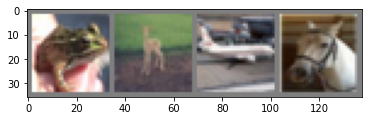

GroundTruth:   frog  deer plane horse


In [131]:
ataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [132]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [133]:
outputs = net(images)

In [134]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog  deer plane  frog


In [135]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [136]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 65.6 %
Accuracy for class car   is: 81.4 %
Accuracy for class bird  is: 16.1 %
Accuracy for class cat   is: 28.7 %
Accuracy for class deer  is: 41.1 %
Accuracy for class dog   is: 67.5 %
Accuracy for class frog  is: 66.8 %
Accuracy for class horse is: 62.0 %
Accuracy for class ship  is: 66.5 %
Accuracy for class truck is: 48.7 %


In [137]:
#Q1:
可以。比如说CNN，cnn本身只是特征提取器，有监督和无监督的区别在于有没有标签，两者是没关系的，所以cnn可以做无监督

#Q2:
# 优点：
# 分布存储和容错性
大规模并行处理
自学习、自组织和自适应性

当数据量较大时可以使用
Q3：
缺点：
著名的“黑匣子”问题
耗时耗力
算力昂贵
数据的来源
当模型太复杂时容易过拟合。
Q4：
特征变量的数目较大时。神经网络算法可以有效地发现数据的底层结构。而且当数据量很大，计算力很强时，神经网络更加适用。

SyntaxError: invalid character in identifier (<ipython-input-137-3f0f3ac3413a>, line 2)